# Implementing Linear Regression on One variable from Scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the dataset from local repository

In [2]:
Dataset = pd.read_csv(r"./LinearRegression-OneVariable.txt")

*The dataset contains two columns - Population of City(in 10,000s) and Profit(in $ 10000s)*

 Describe the dataset to get an overview

In [3]:
Dataset.describe()

,Population of City(in 10000s),Profit(in $10000)
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Convert the dataframe to numpy array and then split the data into input and output sets

In [4]:
dataset = Dataset.values
input_x, output_y = dataset[:,0],dataset[:,-1]

## Visualizing the data

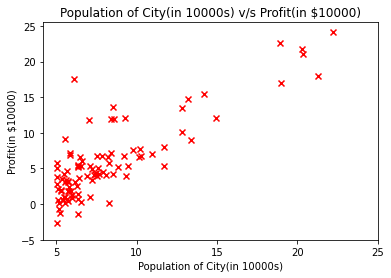

In [5]:
plt.scatter(input_x,output_y,c="red",marker="x")
plt.xticks(np.arange(5,30,5))
plt.yticks(np.arange(-5,30,5))
plt.title("Population of City(in 10000s) v/s Profit(in $10000)")
plt.xlabel("Population of City(in 10000s)")
plt.ylabel("Profit(in $10000)")

plt.show()

## Initialize the paramaters 

In [6]:
def Initialize_parameters(output_y,input_x):
    no_of_samples = len(output_y)
    weights = np.zeros((input_x.reshape(no_of_samples,1).shape[1]+1,1))
    input_x = input_x.reshape(no_of_samples,1)
    output_y = output_y.reshape(no_of_samples,1)
    input_x = np.append(np.ones((no_of_samples,1)),input_x,axis=1)
    return weights,no_of_samples,input_x,output_y

In [7]:
weights, no_of_samples,input_x,output_y = Initialize_parameters(output_y,input_x)

print("Initial weights:","\n",weights)
print("Number of Samples in the dataset:",no_of_samples)
print("Input Matrix:",input_x)
print("Output Matrix:",output_y)

Initial weights: 
 [[0.]
 [0.]]
Number of Samples in the dataset: 97
Input Matrix: [[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.

## Construct/Develop the Hypothesis

In [8]:
def Compute_hypothesis(weights,input_x):
    y_hat = np.dot(input_x,weights)
    return y_hat

## Determine the Cost of Prediction 

In [9]:
def Compute_Cost(weights,input_x,output_y,length):
    y_hat = Compute_hypothesis(weights,input_x)
    mse = (1/(2*length))*np.sum((y_hat - output_y)**2)
    return mse

## Run Gradient Descent 

In [10]:
def Gradient_Descent(num_iterations,J,weights,input_x,alpha,length,output_y):
    for i in range(1,num_iterations+1):
        y_hat = Compute_hypothesis(weights,input_x)
        descent_direction = np.dot(input_x.transpose(),(y_hat - output_y))
        step_length = (alpha/length)*descent_direction
        weights -= step_length
        J.append(Compute_Cost(weights,input_x,output_y,length))
    return weights,J

## Main Function

In [11]:
def LinearRegressionWithOneVariable(num_iterations,J):
    alpha = 0.01
    length = no_of_samples
    theta, J = Gradient_Descent(num_iterations,J,weights,input_x,alpha,length,output_y)
    return theta,J

In [12]:
num_iterations = 1000
J = []
final_weights,cost_array = LinearRegressionWithOneVariable(num_iterations,J)

## Plot the final weights along with data

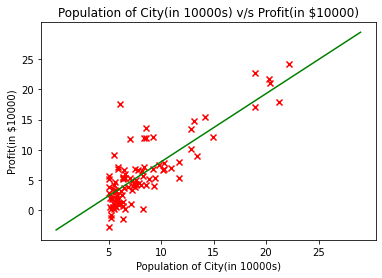

In [14]:
plt_x = dataset[:,0]
plt_y = dataset[:,-1]
plt.scatter(plt_x,plt_y,c="red",marker="x")
plt.xticks(np.arange(5,30,5))
plt.yticks(np.arange(-5,30,5))
x_values = [i for i in range(30)]
y_values = [x*final_weights[1] + final_weights[0] for x in x_values]
plt.plot(x_values,y_values,c="g")
plt.title("Population of City(in 10000s) v/s Profit(in $10000)")
plt.xlabel("Population of City(in 10000s)")
plt.ylabel("Profit(in $10000)")

plt.show()

## Plot the cost Function

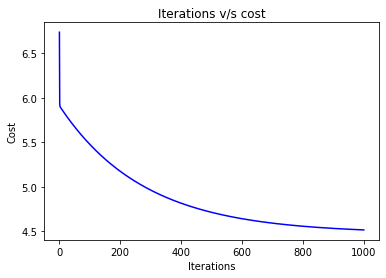

In [15]:
iterations = [i for i in range(1,1001)]
plt.plot(iterations,cost_array,c="blue")
plt.title("Iterations v/s cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

## Use Normal Equation in place of Gradient Descent

In [16]:
input_xnrml,output_ynrml = dataset[:,0],dataset[:,-1]
input_xnrml = input_xnrml.reshape(len(output_ynrml),1)
output_ynrml = output_ynrml.reshape(len(output_ynrml),1)
input_xnrml = np.append(np.ones((len(output_ynrml),1)),input_xnrml, axis=1)
weight_nrml = np.dot(np.dot(np.linalg.inv(np.dot(input_xnrml.T,input_xnrml)),input_xnrml.T),output_ynrml)

In [17]:
print("Weights from Normal Equation:","\n",weight_nrml)
print("Weights from Gradient Descent:","\n",final_weights)

Weights from Normal Equation: 
 [[-3.89578088]
 [ 1.19303364]]
Weights from Gradient Descent: 
 [[-3.24140214]
 [ 1.1272942 ]]


**Final Note:** The Cost function varies on varying the number of iterations, learning rate(alpha).
* The smaller the alpha, the slower the steps towards minimum and if alpha is big, it might overshoot and never converge or diverge

# Using sklearn Library for Linear regression

In [29]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#read the data into independent and dependent variables
no_of_samples = len(dataset[:,-1])
X, y = dataset[:,0].reshape(no_of_samples,1),dataset[:,-1].reshape(no_of_samples,1)

In [30]:
#Split the data into train and test set 

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20)

In [31]:
#train the model on the train set
linearRegression = LinearRegression().fit(X_train,y_train)

**The coefficient of determination(R-squared) is used to calculate accuracy**

**formula** =  *(1 - (Sum_of_residual_squares/total_sum_of_errors))*

**Sum_of_residual_squares:** *((y_pred - y) ** 2).sum()*

**total_sum_of_errors:** *((y - y_mean()) ** 2).sum()*

In [32]:
print(linearRegression.score(X_test,y_test))

0.7909321960298445


In [33]:
y_pred = linearRegression.predict(X_test)

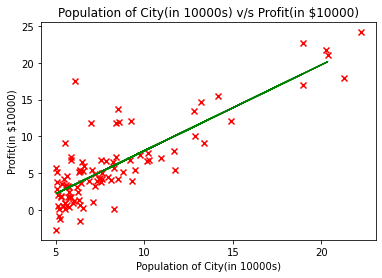

In [34]:
plt.scatter(X,y,c="red",marker="x")
plt.xticks(np.arange(5,30,5))
plt.yticks(np.arange(-5,30,5))
plt.plot(X_test,y_pred,c="g")
plt.title("Population of City(in 10000s) v/s Profit(in $10000)")
plt.xlabel("Population of City(in 10000s)")
plt.ylabel("Profit(in $10000)")

plt.show()

In [35]:
float(linearRegression.coef_)

1.1681319236596563

In [36]:
float(linearRegression.intercept_)

-3.623261184834405

In [37]:
weights_linearRegression = np.zeros((X.shape[1]+1,1))

weights_linearRegression[0] = float(linearRegression.intercept_)
weights_linearRegression[1] = float(linearRegression.coef_)

print("The weights from using inbuilt Linear Regression Model:","\n",weights_linearRegression)

The weights from using inbuilt Linear Regression Model: 
 [[-3.62326118]
 [ 1.16813192]]


In [38]:
print("The weights from using inbuilt Linear Regression Model:","\n",weights_linearRegression)
print("Weights from Normal Equation:","\n",weight_nrml)
print("Weights from Gradient Descent:","\n",final_weights)

The weights from using inbuilt Linear Regression Model: 
 [[-3.62326118]
 [ 1.16813192]]
Weights from Normal Equation: 
 [[-3.89578088]
 [ 1.19303364]]
Weights from Gradient Descent: 
 [[-3.24140214]
 [ 1.1272942 ]]


## Comparing above models 

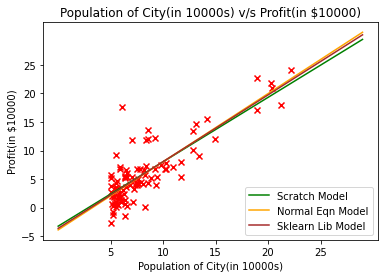

In [39]:
#comparing the weights by plotting them along with data w.r.t Normal equation, sklearn Linear regression, 
#built from scratch Model

#Visualize the dataset w.r.t independent(input) variables and output variables(dependent variables)
plt.scatter(X,y,c="red",marker="x")
plt.xticks(np.arange(5,30,5))
plt.yticks(np.arange(-5,30,5))

#plot weights from Model built from Scratch
x_values = [i for i in range(30)]
y_values = [x*final_weights[1] + final_weights[0] for x in x_values]
plt.plot(x_values,y_values,c="green")

#Plot weights from Normal Equation
y_values_nrml = [x*weight_nrml[1] + weight_nrml[0] for x in x_values]
plt.plot(x_values,y_values_nrml,c="orange")

#Plot weights from In-built model
y_values_sklearn = [x*weights_linearRegression[1] + weights_linearRegression[0] for x in x_values]
plt.plot(x_values,y_values_sklearn,c="brown")

plt.title("Population of City(in 10000s) v/s Profit(in $10000)")
plt.xlabel("Population of City(in 10000s)")
plt.ylabel("Profit(in $10000)")
plt.legend(["Scratch Model", "Normal Eqn Model","Sklearn Lib Model"], loc ="lower right")

plt.show()


